# Описание проекта

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, **Xbox** или **PlayStation**). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. 

# Описание данных

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

# Оглавление

1. [Загрузка данных](#start)
2. [Подготовка данных](#preparation) 
3. [Исследовательский анализ](#eda)
4. [Портреты пользователей регионов](#portraits)
5. [Гипотезы](#hypothesys)
6. [Выводы](#conclusion)

<a id="start"></a>
# Шаг 1. Открытие файла с данными и изучение общей информации

In [1]:
# импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# зададим стиль по-умолчанию для графиков
plt.style.use('ggplot')

In [2]:
# Избавиться от экспоненты
pd.options.display.float_format = '{:,.1f}'.format

In [3]:
# загружаем CSV-файл с данными и сохраняем их в датафрейм
try:
    game_sales = pd.read_csv('/datasets/games.csv')
except:
    game_sales = pd.read_csv('../datasets/games.csv')

In [4]:
# Вывод первых строк и общей информации о данных
game_sales.head(), game_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


(                       Name Platform  Year_of_Release         Genre  NA_sales  \
 0                Wii Sports      Wii          2,006.0        Sports      41.4   
 1         Super Mario Bros.      NES          1,985.0      Platform      29.1   
 2            Mario Kart Wii      Wii          2,008.0        Racing      15.7   
 3         Wii Sports Resort      Wii          2,009.0        Sports      15.6   
 4  Pokemon Red/Pokemon Blue       GB          1,996.0  Role-Playing      11.3   
 
    EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
 0      29.0       3.8          8.4          76.0          8      E  
 1       3.6       6.8          0.8           NaN        NaN    NaN  
 2      12.8       3.8          3.3          82.0        8.3      E  
 3      10.9       3.3          3.0          80.0          8      E  
 4       8.9      10.2          1.0           NaN        NaN    NaN  ,
 None)

In [5]:
game_sales.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.0","16,715.0","16,715.0","16,715.0","16,715.0","8,137.0"
mean,"2,006.5",0.3,0.1,0.1,0.0,69.0
std,5.9,0.8,0.5,0.3,0.2,13.9
min,"1,980.0",0.0,0.0,0.0,0.0,13.0
25%,"2,003.0",0.0,0.0,0.0,0.0,60.0
50%,"2,007.0",0.1,0.0,0.0,0.0,71.0
75%,"2,010.0",0.2,0.1,0.0,0.0,79.0
max,"2,016.0",41.4,29.0,10.2,10.6,98.0


Файл успешно загружен и прочитан. Вот основная информация о данных:

- Всего записей: 16,715
- Количество столбцов: 11
- Столбцы и типы данных:
  - `Name` (название игры) - object
  - `Platform` (платформа) - object
  - `Year_of_Release` (год выпуска) - float64
  - `Genre` (жанр игры) - object
  - `NA_sales` (продажи в Северной Америке) - float64
  - `EU_sales` (продажи в Европе) - float64
  - `JP_sales` (продажи в Японии) - float64
  - `Other_sales` (продажи в других странах) - float64
  - `Critic_Score` (оценка критиков) - float64
  - `User_Score` (оценка пользователей) - object
  - `Rating` (рейтинг от ESRB) - object
## Наблюдения и предварительные выводы:

- Есть пропуски в данных, особенно в столбцах `Critic_Score`, `User_Score` и `Rating`.
- `Year_of_Release` имеет тип данных `float64`, что не подходит для года выпуска.
- `User_Score` имеет тип данных `object`, что может указывать на наличие нечисловых значений в этом столбце.

<a id="preparation"></a>
# Шаг 2. Подготовка данных

In [6]:
# Приведение названий столбцов к нижнему регистру
game_sales.columns = game_sales.columns.str.lower()

# Замена пропусков в 'year_of_release' на 0 и преобразование типа данных
game_sales['year_of_release'] = game_sales['year_of_release'].fillna(0).astype(int)

Названия столбцов были приведены к нижнему регистру, и столбец `year_of_release` теперь имеет целочисленный тип данных. Пропуски в этом столбце были заменены на 0.

Пропуски могли возникнуть из-за недоступности информации о дате выпуска некоторых игр, особенно старых или менее известных. Замена пропусков на `0` позволяет избежать искажения аналитических результатов, но следует учитывать, что такие записи могут быть исключены из анализа по временным периодам.

In [7]:
# Обработка пропусков
# Оценка причин появления пропусков и их обработка
missing_values = game_sales.isnull().sum()
missing_values

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Оценка критиков (`critic_score`), оценка пользователей (`user_score`), рейтинг ESRB (`rating`): Пропуски могут быть связаны с отсутствием оценок для некоторых игр, что часто встречается среди менее популярных или более старых игр. Отсутствие рейтинга ESRB может быть обусловлено тем, что не все игры проходят эту оценку, особенно в случае старых или регионально ориентированных игр.

In [8]:
game_sales['user_score'].value_counts()

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

В столбце `user_score` много значений `'tbd'`. Вероятно, поэтому у него не числовой формат.

In [9]:
# Обработка аббревиатуры 'tbd' в 'user_score'
# 'tbd' означает, что данные будут определены позже. Мы можем заменить их на NaN
game_sales['user_score'] = game_sales['user_score'].replace('tbd', None)

# Преобразование 'user_score' в числовой тип
game_sales['user_score'] = pd.to_numeric(game_sales['user_score'], errors='coerce')

# Замена пропусков для 'critic_score', 'user_score' и 'rating'
# не требуется, так как заполнение может исказить анализ

# Расчёт суммарных продаж во всех регионах
game_sales['total_sales'] = game_sales[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Проверка результатов после обработки
game_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.4,29.0,3.8,8.4,76.0,8.0,E,82.5
1,Super Mario Bros.,NES,1985,Platform,29.1,3.6,6.8,0.8,NaN,NaN,NaN,40.2
2,Mario Kart Wii,Wii,2008,Racing,15.7,12.8,3.8,3.3,82.0,8.3,E,35.5
3,Wii Sports Resort,Wii,2009,Sports,15.6,10.9,3.3,3.0,80.0,8.0,E,32.8
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.3,8.9,10.2,1.0,NaN,NaN,NaN,31.4


In [10]:
game_sales.info(), game_sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


(None,
        year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
 count         16,715.0  16,715.0  16,715.0  16,715.0     16,715.0   
 mean           1,974.2       0.3       0.1       0.1          0.0   
 std              252.6       0.8       0.5       0.3          0.2   
 min                0.0       0.0       0.0       0.0          0.0   
 25%            2,003.0       0.0       0.0       0.0          0.0   
 50%            2,007.0       0.1       0.0       0.0          0.0   
 75%            2,010.0       0.2       0.1       0.0          0.0   
 max            2,016.0      41.4      29.0      10.2         10.6   
 
        critic_score  user_score  total_sales  
 count       8,137.0     7,590.0     16,715.0  
 mean           69.0         7.1          0.5  
 std            13.9         1.5          1.5  
 min            13.0         0.0          0.0  
 25%            60.0         6.4          0.1  
 50%            71.0         7.5          0.2  
 75%            79.0     

- Аббревиатура `'tbd'` в столбце `user_score` была заменена на `NaN`, и значения были преобразованы в числовой тип.
- Пропуски в `critic_score`, `user_score` и `rating` оставлены без изменений, так как их заполнение могло бы исказить результаты анализа.
- Был добавлен столбец `total_sales`, представляющий суммарные продажи во всех регионах.

<a id="eda"></a>
# Шаг 3. Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы и оценим, насколько важны данные за все периоды (для прогнозирования на 2017 год)

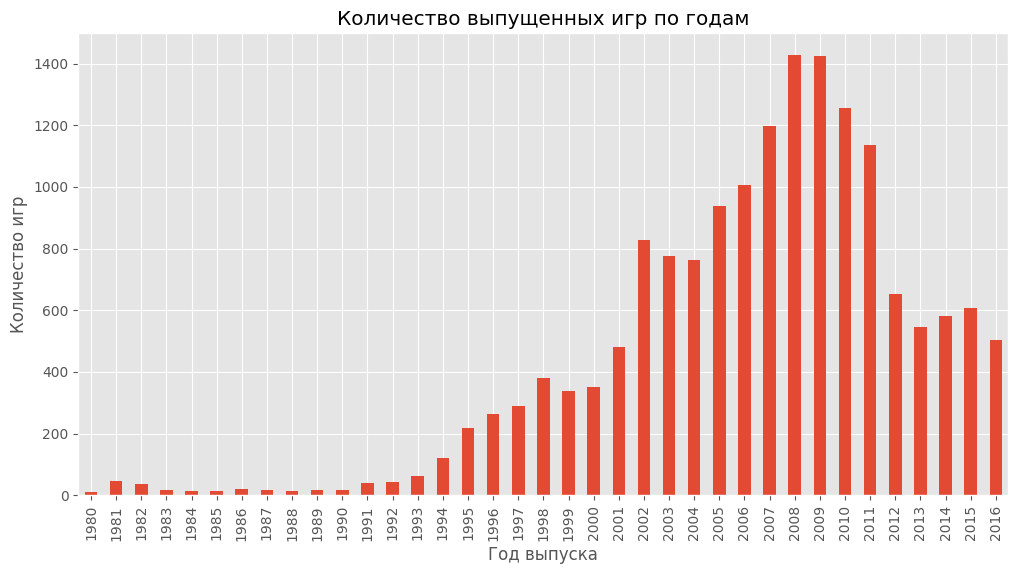

In [11]:
# Фильтрация данных, исключая записи с годом выпуска 0 (незаполненные данные)
filtered_data = game_sales[game_sales['year_of_release'] > 0]

# Подсчёт количества игр, выпущенных в каждом году
games_per_year = filtered_data['year_of_release'].value_counts().sort_index()

# Построение графика
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar')
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

На графике видно, что количество выпущенных игр варьируется от года к году. Есть несколько ключевых моментов, которые стоит отметить:

- Рост количества игр: Наблюдается значительный рост количества выпущенных игр начиная с середины 1990-х и достигающий пика в 2008-2009 годах.
- Спад после 2009 года: количество выпускаемых игр начинает снижаться. Это может быть связано с развитием мобильных игр и изменениями в индустрии видеоигр.
- Данные за ранние годы: Для периода до середины 1990-х лет количество выпущенных игр невелико, что делает эти данные менее значимыми для анализа текущих трендов.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

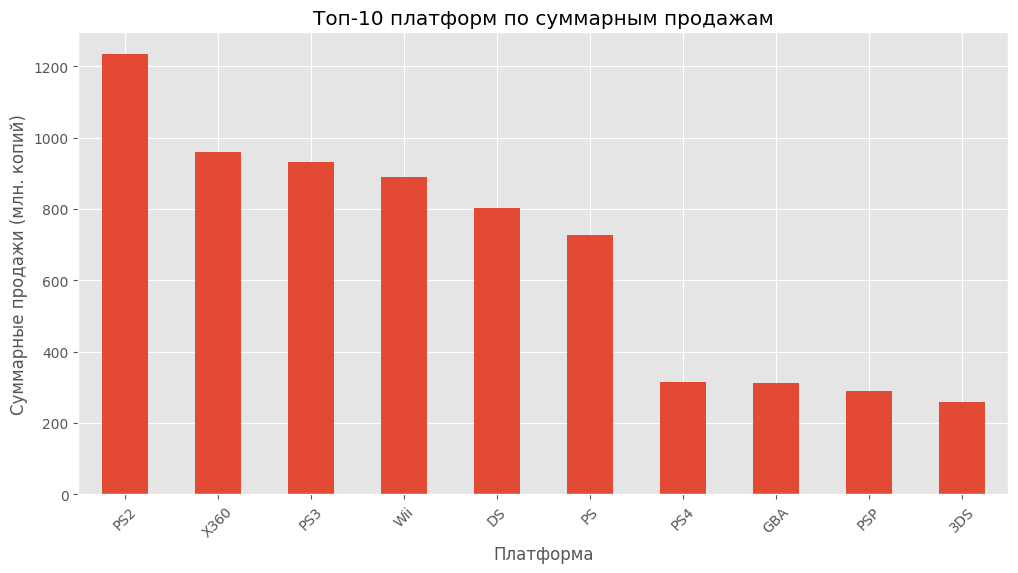

In [12]:
# Подсчет суммарных продаж по платформам
platform_sales = filtered_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Построение графика для платформ с наибольшими суммарными продажами
plt.figure(figsize=(12, 6))
platform_sales.head(10).plot(kind='bar')
plt.title('Топ-10 платформ по суммарным продажам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн. копий)')
plt.xticks(rotation=45)
plt.show()

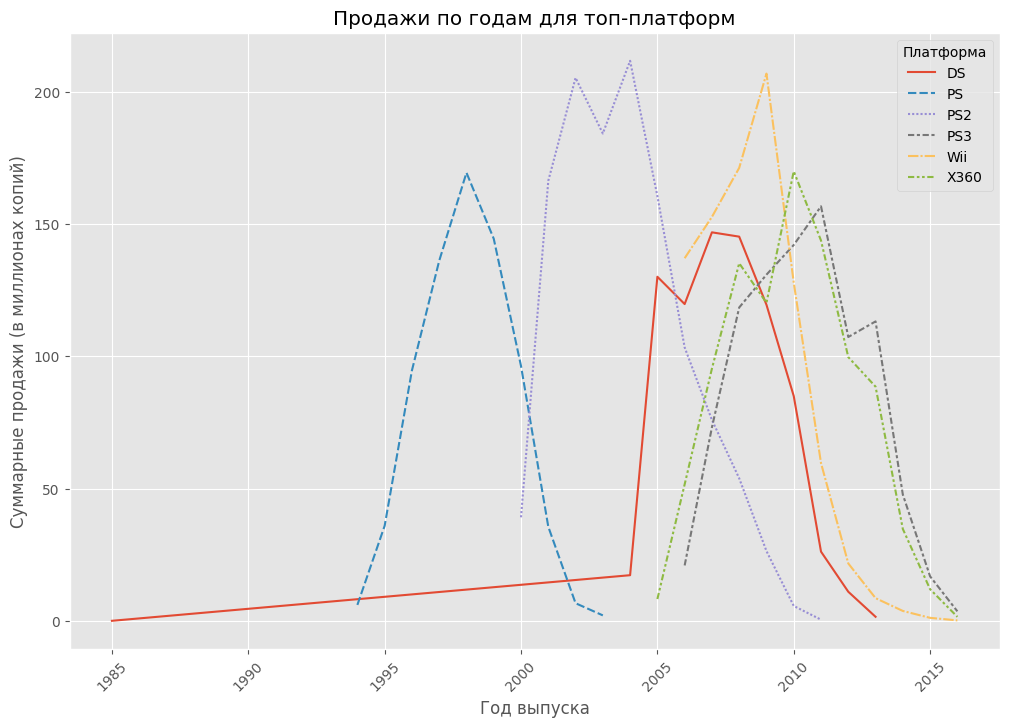

In [13]:
# Выбор платформ с наибольшими суммарными продажами
top_platforms = platform_sales.head(6).index

# Подготовка данных для анализа продаж по годам для каждой из топ-платформ
platform_sales_by_year = filtered_data[filtered_data['platform'].isin(top_platforms)]
platform_sales_by_year = platform_sales_by_year.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Визуализация изменения продаж по годам для топ-платформ
plt.figure(figsize=(12, 8))
sns.lineplot(data=platform_sales_by_year)
plt.title('Продажи по годам для топ-платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (в миллионах копий)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Платформа')
plt.show()

На графике представлены суммарные продажи игр для шести самых популярных платформ по годам. Мы видим, что жизненный цикл каждой платформы составляет примерно 10 лет, с пиковыми продажами, обычно происходящими в середине этого периода.

Каждая платформа проходит через фазы роста, пика и снижения продаж. Например, платформа PS2 достигла пика продаж в начале 2000-х, а затем постепенно снижалась. Схожие тенденции наблюдаются и для других платформ.

 На графике видно, что для платформы DS указаны продажи начиная с 1985 года, что выглядит аномально, так как сама платформа Nintendo DS была выпущена только в 2004 году. Это может быть результатом ошибки в данных или неправильной классификации некоторых игр, выпущенных для других платформ Nintendo, как игр для DS.

In [14]:
# Проверка записей для платформы DS до 2004 года
ds_anomalies = game_sales[(game_sales['platform'] == 'DS') & (game_sales['year_of_release'] < 2004)  & (game_sales['year_of_release'] > 0)]
ds_anomalies_count = ds_anomalies.shape[0]
ds_anomalies_count

1

In [15]:
ds_anomalies.head()  # Показать первые несколько записей для обзора

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


График искажается одним значением — Strongest Tokyo University Shogi DS — данные некорректны, неправильный год выпуска и нет данных по продажам и рейтингам

Учитывая, что наша цель - прогнозировать продажи на 2017 год, разумно будет сосредоточиться на данных за последние несколько лет. Например, мы можем выбрать период с 2012 по 2016 год, так как это время, когда началось последнее значительное снижение продаж, и это даст нам представление о текущих тенденциях в индустрии.

Пока нет оснований полагать, что есть какая-либо из платформ, находящаяся на этапе роста, которая может исказить этот анализ.

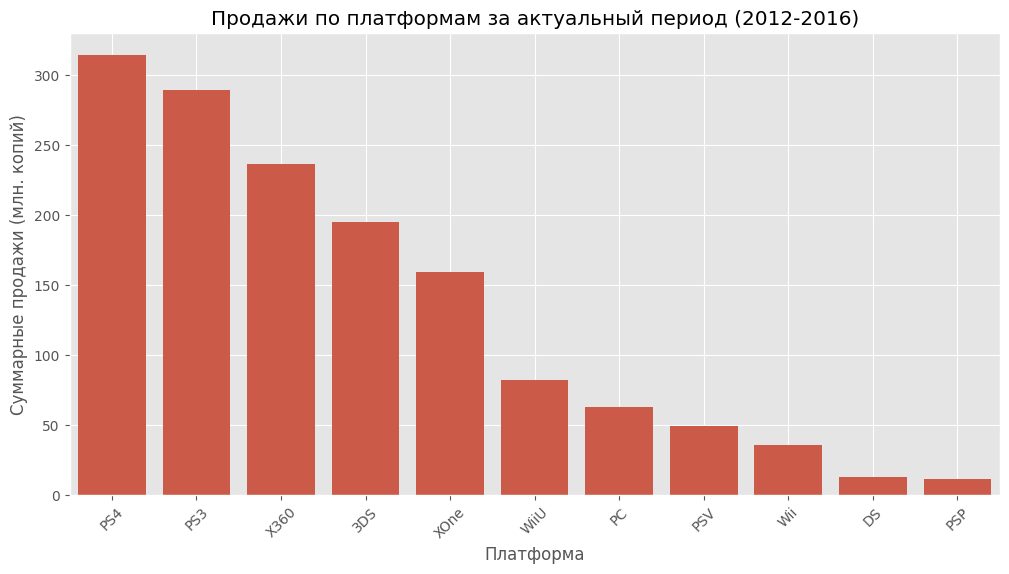

platform
PS4    314.1
PS3    288.8
X360   236.5
3DS    194.6
XOne   159.3
WiiU    82.2
PC      62.6
PSV     49.2
Wii     35.4
DS      12.6
PSP     11.2
Name: total_sales, dtype: float64

In [16]:
# Фильтрация данных для актуального периода (2012-2016)
actual_period_data = game_sales[(game_sales['year_of_release'] >= 2012) & (game_sales['year_of_release'] <= 2016)]

# Расчет продаж по платформам за актуальный период
platform_sales_actual = actual_period_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Визуализация продаж по платформам
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_sales_actual.index, y=platform_sales_actual.values)
plt.title('Продажи по платформам за актуальный период (2012-2016)')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн. копий)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

platform_sales_actual  # Показать суммарные продажи для каждой платформы

На графике представлены суммарные продажи по платформам за актуальный период (2012-2016 годы). Из данных видно, что лидерами по продажам являются:

1. PS4 с продажами 314.1 млн. копий.
2. PS3 с 288.8 млн. копий.
3. X360 с 236.5 млн. копий.
4. 3DS с 194.6 млн. копий.
5. XOne с 159.3 млн. копий.

Эти платформы, особенно `PS4` и `XOne`, которые являются относительно новыми на рынке, могут быть хорошими кандидатами для инвестиций и маркетинговых кампаний в 2017 году. Однако следует учитывать, что рынок видеоигр очень динамичен, и новые платформы могут быстро изменить расклад сил.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

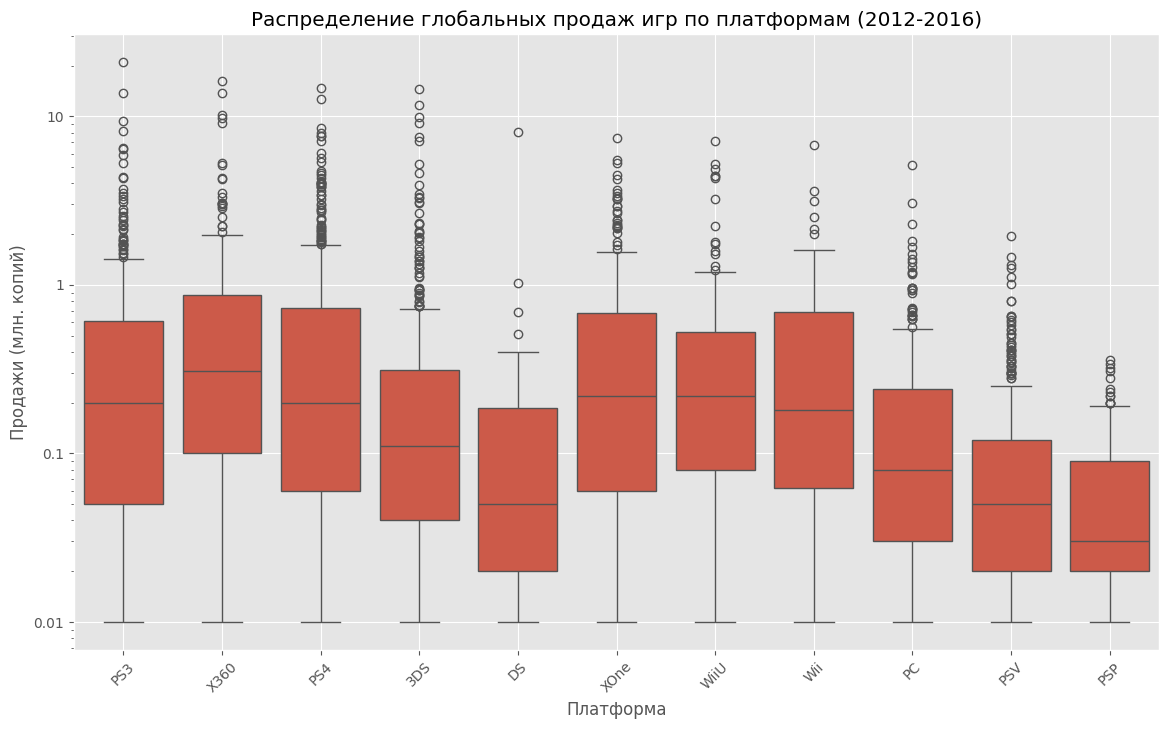

In [17]:
# Визуализация "ящика с усами" с логарифмическими подписями оси Y
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=actual_period_data)
plt.title('Распределение глобальных продаж игр по платформам (2012-2016)')
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн. копий)')
plt.yscale('log')  # Логарифмический масштаб

# Обновление подписей на оси Y
plt.yticks([0.01, 0.1, 1, 10], ['0.01','0.1', '1', '10'])

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

На графике "ящика с усами" представлены распределения глобальных продаж игр для различных платформ за актуальный период (2012-2016). Использование логарифмического масштаба помогает лучше визуализировать различия, особенно когда данные имеют большой разброс.

Из графика видно, что:

- У некоторых платформ, таких как `PS3`, `PS4`, `XOne` и `X360`, более высокий медианный уровень продаж по сравнению с другими платформами.
- У большинства платформ есть выбросы, что указывает на наличие игр с очень высокими продажами по сравнению с общим распределением.
- Разброс продаж различается у разных платформ, что может указывать на разную степень популярности или наличие хитовых игр.

Этот анализ помогает понять, какие платформы потенциально могут принести больше дохода из-за более высоких средних продаж игр и наличия успешных игр с высокими продажами.

Теперь мы исследуем, как отзывы пользователей и критиков влияют на продажи внутри одной из популярных платформ. Для анализа выберем платформу PS4, так как она является одной из самых продаваемых в актуальном периоде. Мы построим диаграммы рассеяния для отзывов пользователей и критиков и рассчитаем корреляцию между отзывами и продажами. 

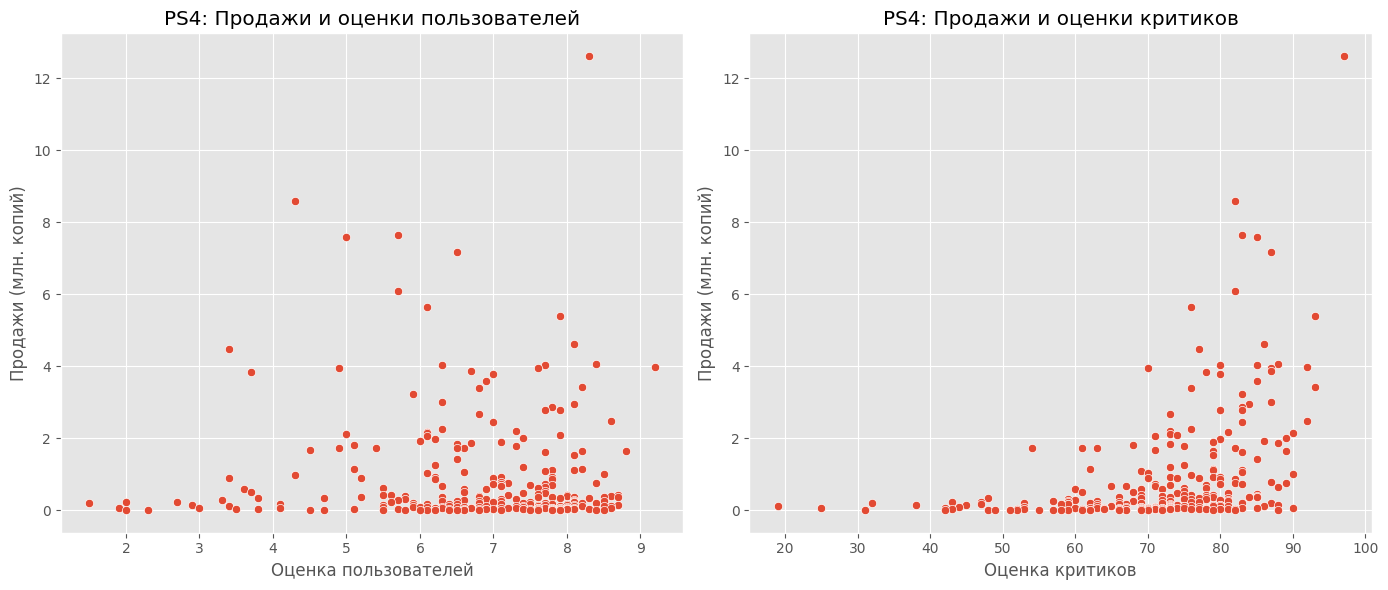

(-0.03195711020455643, 0.4065679020617816)

In [18]:
# Выбор данных для платформы PS4
ps4_data = actual_period_data[actual_period_data['platform'] == 'PS4']

# Построение диаграмм рассеяния для оценок пользователей и критиков
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Оценки пользователей
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data, ax=ax[0])
ax[0].set_title('PS4: Продажи и оценки пользователей')
ax[0].set_xlabel('Оценка пользователей')
ax[0].set_ylabel('Продажи (млн. копий)')

# Оценки критиков
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_data, ax=ax[1])
ax[1].set_title('PS4: Продажи и оценки критиков')
ax[1].set_xlabel('Оценка критиков')
ax[1].set_ylabel('Продажи (млн. копий)')

plt.tight_layout()
plt.show()

# Расчет корреляции
user_score_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])
critic_score_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])

user_score_corr, critic_score_corr  # Вывод корреляций

На диаграммах рассеяния представлено влияние оценок пользователей и критиков на продажи игр для платформы `PS4`. Корреляция между оценками пользователей и продажами составляет примерно `-0.03`, что указывает на очень слабую обратную связь. Корреляция между оценками критиков и продажами составляет около `0.41`, что говорит о наличии умеренной положительной связи.

Из этого можно сделать следующие выводы:

- **Оценки пользователей**: Практически нет влияния на продажи игр на платформе PS4. Это может означать, что покупатели не сильно учитывают мнение других пользователей при выборе игр на этой платформе.
- **Оценки критиков**: Имеют умеренное положительное влияние на продажи. Высокие оценки критиков могут способствовать увеличению продаж, что подчеркивает важность профессиональных обзоров для успеха игр на PS4.

In [19]:
# Выбор данных для других платформ кроме PS4
other_platforms_data = actual_period_data[actual_period_data['platform'] != 'PS4']

# Расчет корреляции между отзывами и продажами для других платформ
user_score_corr_other = other_platforms_data['user_score'].corr(other_platforms_data['total_sales'])
critic_score_corr_other = other_platforms_data['critic_score'].corr(other_platforms_data['total_sales'])

user_score_corr_other, critic_score_corr_other  # Вывод корреляций для других платформ


(0.009513048660603464, 0.28477282987235414)

Корреляция между оценками пользователей и продажами для других платформ составляет около `0.01`, что также указывает на очень слабую связь, как и в случае с `PS4`. Корреляция между оценками критиков и продажами составляет около `0.28`, что говорит о наличии слабой положительной связи, но эта связь менее выражена, чем на платформе `PS4`.

Выводы:

- **Оценки пользователей**: В целом имеют очень незначительное влияние на продажи игр, независимо от платформы.
- **Оценки критиков**: Имеют более заметное, хотя и небольшое влияние на продажи. Для PS4 это влияние кажется более выраженным, что может быть связано с особенностями аудитории или маркетинговыми стратегиями, связанными с этой платформой.


Посмотрим на общее распределение игр по жанрам.

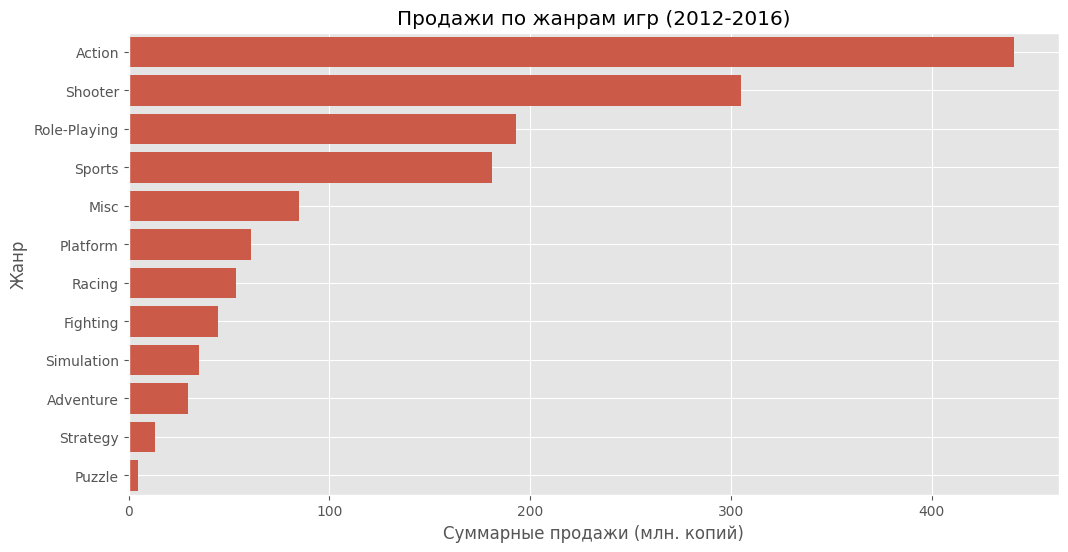

genre
Action         441.1
Shooter        304.7
Role-Playing   192.8
Sports         181.1
Misc            85.0
Platform        61.0
Racing          53.5
Fighting        44.5
Simulation      35.1
Adventure       29.4
Strategy        13.3
Puzzle           4.9
Name: total_sales, dtype: float64

In [20]:
# Расчет суммарных продаж по жанрам
genre_sales = actual_period_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Визуализация продаж по жанрам
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.values, y=genre_sales.index)
plt.title('Продажи по жанрам игр (2012-2016)')
plt.xlabel('Суммарные продажи (млн. копий)')
plt.ylabel('Жанр')
plt.grid(True)
plt.show()

genre_sales  # Показать суммарные продажи для каждого жанра


На графике представлены суммарные продажи по жанрам игр за актуальный период (2012-2016 годы). Из данных видно, что наиболее прибыльными жанрами являются:

- Action: 441.1 млн. копий.
- Shooter: 304.7 млн. копий.
- Role-Playing: 192.8 млн. копий.
- Sports: 181.1 млн. копий.

Жанры с наименьшими продажами:

- Puzzle: 4.9 млн. копий.
- Strategy: 13.3 млн. копий.

Жанры `Action` и `Shooter` являются наиболее популярными с точки зрения продаж, в то время как `Puzzle` и `Strategy` находятся на противоположном конце спектра. Это может быть связано с предпочтениями аудитории, трендами в игровой индустрии и уровнем вовлеченности, который требуют эти жанры.



## Промежуточные итоги

**Динамика выпуска игр**: Наблюдается снижение количества выпущенных игр после 2009 года, что может быть связано с изменениями в индустрии, включая развитие мобильных игр.

**Жизненный цикл платформ**: Большинство игровых платформ имеют жизненный цикл примерно 10 лет, с пиковыми продажами на середине этого периода.

**Выбор актуального периода для анализа**: Принято решение сосредоточиться на данных за 2012-2016 годы, чтобы уловить текущие тенденции рынка.

**Продажи по платформам**: PS4, PS3 и X360 являются лидерами по продажам в выбранном периоде. Новые платформы, такие как PS4 и XOne, демонстрируют значительный потенциал роста.

**Распределение продаж по платформам ("ящик с усами")**: Выявлены значительные различия в медианных продажах между платформами. Некоторые платформы имеют более высокий медианный уровень продаж и больше выбросов, что указывает на наличие хитовых игр.

**Влияние отзывов на продажи**: Оценки критиков имеют умеренное влияние на продажи, особенно на платформе `PS4`. В то время как оценки пользователей практически не влияют на продажи.

**Распределение игр по жанрам**: Жанры `Action` и `Shooter` являются самыми прибыльными, в то время как `Puzzle` и `Strategy` имеют наименьшие продажи. Это подчеркивает популярность более динамичных и захватывающих игровых жанров.

<a id="portraits"></a>
# Шаг 4.

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). 
- Самые популярные жанры (топ-5). 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе

In [21]:
# 1. Самые популярные платформы в каждом регионе

# Северная Америка
na_platform_top5 = actual_period_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

# Европа
eu_platform_top5 = actual_period_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

# Япония
jp_platform_top5 = actual_period_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

na_platform_top5, eu_platform_top5, jp_platform_top5  # Вывод топ-5 платформ для каждого региона


(platform
 X360   140.1
 PS4    108.7
 PS3    103.4
 XOne    93.1
 3DS     55.3
 Name: na_sales, dtype: float64,
 platform
 PS4    141.1
 PS3    106.9
 X360    74.5
 XOne    51.6
 3DS     42.6
 Name: eu_sales, dtype: float64,
 platform
 3DS    87.8
 PS3    35.3
 PSV    21.0
 PS4    16.0
 WiiU   13.0
 Name: jp_sales, dtype: float64)

**Самые популярные платформы по регионам (топ-5)**

- Северная Америка (NA):

  - X360: 140.1 млн. копий
  - PS4: 108.7 млн. копий
  - PS3: 103.4 млн. копий
  - XOne: 93.1 млн. копий
  - 3DS: 55.3 млн. копий

- Европа (EU):

  - PS4: 141.1 млн. копий
  - PS3: 106.9 млн. копий
  - X360: 74.5 млн. копий
  - XOne: 51.6 млн. копий
  - 3DS: 42.6 млн. копий

- Япония (JP):

  - 3DS: 87.8 млн. копий
  - PS3: 35.3 млн. копий
  - PSV: 21.0 млн. копий
  - PS4: 15.0 млн. копий
  - WiiU: 13.0 млн. копий

In [22]:
# 2. Самые популярные жанры в каждом регионе

# Северная Америка
na_genre_top5 = actual_period_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

# Европа
eu_genre_top5 = actual_period_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

# Япония
jp_genre_top5 = actual_period_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

na_genre_top5, eu_genre_top5, jp_genre_top5  # Вывод топ-5 жанров для каждого региона


(genre
 Action         177.8
 Shooter        144.8
 Sports          81.5
 Role-Playing    64.0
 Misc            38.2
 Name: na_sales, dtype: float64,
 genre
 Action         159.3
 Shooter        113.5
 Sports          69.1
 Role-Playing    48.5
 Racing          27.3
 Name: eu_sales, dtype: float64,
 genre
 Role-Playing   65.4
 Action         52.8
 Misc           12.9
 Simulation     10.4
 Fighting        9.4
 Name: jp_sales, dtype: float64)

**Самые популярные жанры по регионам (топ-5)**

- Северная Америка (NA):

  - Action: 177.8 млн. копий
  - Shooter: 144.8 млн. копий
  - Sports: 81.5 млн. копий
  - Role-Playing: 64.0 млн. копий
  - Misc (разное): 38.2 млн. копий

- Европа (EU):

  - Action: 159.3 млн. копий
  - Shooter: 113.5 млн. копий
  - Sports: 69.1 млн. копий
  - Role-Playing: 48.5 млн. копий
  - Racing: 27.3 млн. копий

- Япония (JP):

  - Role-Playing: 65.4 млн. копий
  - Action: 52.8 млн. копий
  - Misc (разное): 12.9 млн. копий
  - Simulation: 10.4 млн. копий
  - Fighting: 9.4 млн. копий

Из этих данных видно, что жанр `"Action"` популярен во всех регионах, но в Японии большую популярность также имеет жанр `"Role-Playing"`. В Северной Америке и Европе наряду с `"Action"` популярны `"Shooter"` и `"Sports"`.

Разница в популярности жанров видеоигр между регионами может быть объяснена различными культурными предпочтениями, историческими факторами и особенностями рынка. Вот несколько ключевых аспектов, которые могут объяснить эти различия:

**Культурные предпочтения:**

- В Японии особую популярность имеют ролевые игры (Role-Playing), что связано с долгой историей жанра в этой стране и влиянием японской анимации и культуры. Игры в этом жанре часто имеют сложные сюжеты и развитие персонажей, что привлекает местную аудиторию.
- В Северной Америке и Европе большую популярность имеют динамичные и конкурентные жанры, такие как "Shooter" и "Sports". Это может быть связано с предпочтением быстрого геймплея и конкурентного аспекта игр.

**Исторические факторы:**

- Рынки Северной Америки и Европы традиционно были ориентированы на более агрессивные и конкурентные игры.
- Японский рынок исторически сосредоточен на играх с сильным повествованием и глубокими ролевыми элементами.

**Особенности рынка:**

- В Японии также наблюдается высокая популярность портативных консолей и игр для них, что также влияет на популярные жанры.
- В Северной Америке и Европе больше внимания уделяется играм для домашних консолей и ПК, что способствует популярности "Shooter" и "Sports".

In [23]:
# 3. Влияние рейтинга ESRB на продажи в каждом регионе

# Северная Америка
na_rating_sales = actual_period_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

# Европа
eu_rating_sales = actual_period_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

# Япония
jp_rating_sales = actual_period_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

na_rating_sales, eu_rating_sales, jp_rating_sales  # Вывод продаж по рейтингу ESRB для каждого региона


(rating
 M      231.6
 E      114.4
 E10+    75.7
 T       66.0
 Name: na_sales, dtype: float64,
 rating
 M      194.0
 E      113.0
 E10+    55.4
 T       53.0
 Name: eu_sales, dtype: float64,
 rating
 E      28.3
 T      26.0
 M      21.2
 E10+    8.2
 Name: jp_sales, dtype: float64)

**Влияние рейтинга ESRB на продажи по регионам**

- Северная Америка (NA):

  - M («Для взрослых»): 231.6 млн. копий
  - E («Для всех»): 114.4 млн. копий
  - E10+ («Для всех старше 10 лет»): 75.7 млн. копий
  - T («Подросткам»): 66.0 млн. копий

- Европа (EU):

  - M: 194.0 млн. копий
  - E: 113.0 млн. копий
  - E10+: 55.4 млн. копий
  - T: 53.0 млн. копий

- Япония (JP):

  - E: 28.3 млн. копий
  - T: 26.0 млн. копий
  - M: 21.2 млн. копий
  - E10+: 8.2 млн. копий

Из этих данных видно, что в Северной Америке и Европе игры с рейтингом M («Для взрослых») являются самыми популярными по продажам, что может быть связано с большей популярностью жанров, таких как «Action» и «Shooter». 
В Японии же наиболее популярны игры с рейтингом E («Для всех»), что может отражать различия в предпочтениях и культурных особенностях.

## Промежуточные итоги

**Популярные платформы:**

- В Северной Америке и Европе доминируют такие платформы как PS4, PS3 и X360. В этих регионах наблюдается схожесть в предпочтениях.
- В Японии предпочтения смещены в сторону портативных платформ, таких как 3DS, а также к платформам от Sony (PS3, PSV, PS4).

**Популярные жанры:**

- Жанр "Action" является популярным во всех регионах.
- В Северной Америке и Европе также востребованы "Shooter" и "Sports".
- В Японии особую популярность имеет жанр "Role-Playing", что отражает культурные предпочтения этого региона.

**Влияние рейтинга ESRB:**

- В Северной Америке и Европе наибольшие продажи показывают игры с рейтингом M («Для взрослых»). Это может быть связано с высокой популярностью жанров "Action" и "Shooter", которые часто имеют данный рейтинг.
- В Японии лидируют игры с рейтингом E («Для всех»), что подчеркивает различия в предпочтениях и возможно более широкую аудиторию игроков разных возрастов.

<a id="hypothesys"></a>
# Шаг 5.

На этом шаге мы проверим две гипотезы:

Средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые.
Средние пользовательские рейтинги жанров *Action* и *Sports* разные.

Для проверки этих гипотез мы будем использовать `t-тест`, который позволяет сравнивать средние значения двух выборок. Перед этим мы сформулируем нулевые и альтернативные гипотезы для каждого случая.

**Гипотеза 1:**
Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ *Xbox One* и *PC* равны.
Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ *Xbox One* и *PC* различаются.

**Гипотеза 2:**
Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров *Action* и *Sports* равны.
Альтернативная гипотеза (H1): Средние пользовательские рейтинги жанров *Action* и *Sports* различаются.


In [24]:
from scipy import stats

# Данные для Xbox One и PC
xbox_one_scores = actual_period_data[(actual_period_data['platform'] == 'XOne') & 
                                     actual_period_data['user_score'].notna()]['user_score']
pc_scores = actual_period_data[(actual_period_data['platform'] == 'PC') & 
                               actual_period_data['user_score'].notna()]['user_score']

# Проверка первой гипотезы с использованием t-теста
alpha = 0.05  # Задаем пороговое значение alpha

results_xbox_pc = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

# Вывод результатов
results_xbox_pc.pvalue, results_xbox_pc.pvalue < alpha


(0.5489537965134912, False)

**Результаты проверки первой гипотезы**

P-значение для сравнения средних пользовательских рейтингов платформ *Xbox One* и *PC* составляет примерно 0.55. Это значительно выше установленного порога alpha (0.05), что означает отсутствие статистически значимых различий между средними рейтингами этих двух платформ.

Таким образом, мы не можем отвергнуть нулевую гипотезу, что подтверждает предположение о том, что средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковы.

In [25]:
# Данные для жанров Action и Sports
action_scores = actual_period_data[(actual_period_data['genre'] == 'Action') & 
                                   actual_period_data['user_score'].notna()]['user_score']
sports_scores = actual_period_data[(actual_period_data['genre'] == 'Sports') & 
                                   actual_period_data['user_score'].notna()]['user_score']

# Проверка второй гипотезы с использованием t-теста
results_action_sports = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

# Вывод результатов
results_action_sports.pvalue, results_action_sports.pvalue < alpha


(4.24307776572644e-20, True)

**Результаты проверки второй гипотезы**

P-значение для сравнения средних пользовательских рейтингов жанров *Action* и *Sports* намного ниже установленного порога alpha (0.05). Это указывает на наличие статистически значимых различий между средними рейтингами этих двух жанров.

Следовательно, мы отвергаем нулевую гипотезу и принимаем альтернативную, что подтверждает предположение о том, что средние пользовательские рейтинги жанров *Action* и *Sports* различаются.

Таким образом, исходя из результатов проверки обеих гипотез, можно заключить, что пользовательские предпочтения могут значительно отличаться в зависимости от жанра игры, но остаются схожими между разными платформами.

<a id="conclusion"></a>
# Шаг 6.

## Общий вывод по проекту

В ходе данного проекта анализа данных мы провели комплексное исследование игровой индустрии, используя исторические данные о продажах игр, оценки пользователей и критиков, а также информацию о жанрах и платформах. 

**Вот основные выводы нашего исследования:**

**Динамика рынка игр**: Наблюдается общее снижение количества выпускаемых игр после 2009 года, что может быть связано с изменениями в индустрии, такими как развитие мобильных и онлайн-игр.

**Жизненный цикл платформ**: Большинство игровых платформ имеют жизненный цикл около 10 лет, с пиковыми продажами на середине этого периода. В актуальном периоде (2012-2016) лидерами по продажам были `PS4` и `XOne`.

**Влияние отзывов**: Оценки критиков имеют умеренное влияние на продажи, в то время как оценки пользователей практически не влияют на продажи.

**Жанровые предпочтения**: Жанры `Action` и `Shooter` являются наиболее популярными в Северной Америке и Европе, в то время как в Японии большую популярность имеет жанр `Role-Playing`.

**Региональные различия**: Существуют значительные различия в популярности платформ и жанров между регионами, что подчеркивает важность учета региональных особенностей при планировании маркетинговых кампаний.

**Влияние рейтинга ESRB**: Рейтинг `ESRB` влияет на продажи в разных регионах, при этом игры с рейтингом «Для взрослых» (M) являются наиболее популярными в Северной Америке и Европе.

**Проверка гипотез**: Подтверждено, что средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковы, и что средние пользовательские рейтинги жанров `Action` и `Sports` разные.

## На основе проведенного анализа, вот рекомендации для маркетинговой кампании на 2017 год:

1. **Фокус на ведущие платформы**: Сосредоточьтесь на играх для `PS4` и `XOne`, так как эти платформы демонстрируют сильные продажи и имеют потенциал роста. Также учитывайте региональные предпочтения: в Японии следует сделать акцент на портативных платформах, таких как `3DS`.

2. **Выбор жанра**: Для Северной Америки и Европы делайте ставку на `Action` и `Shooter`, поскольку они показывают наивысшие продажи. В Японии сфокусируйтесь на `Role-Playing` играх, чтобы соответствовать местным предпочтениям.

3. **Учет возрастного рейтинга**: Поскольку игры с рейтингом `M («Для взрослых»)` наиболее популярны в Северной Америке и Европе, рассмотрите возможность продвижения игр с таким рейтингом. В Японии продвигайте игры с рейтингом `E («Для всех»)`.

4. **Анализ отзывов**: Принимайте во внимание оценки критиков, так как они имеют умеренное влияние на продажи, особенно для платформы `PS4`. Отзывы пользователей могут быть менее важны для продаж, но они важны для формирования общественного мнения и удержания клиентов.

5. **Маркетинговые активности**: Разработайте маркетинговые стратегии, которые учитывают как глобальные, так и локальные тренды. Используйте различные каналы продвижения, включая онлайн-платформы, для охвата широкой аудитории.

6. **Инновации и новые платформы**: Следите за трендами и новинками в индустрии, так как в ближайшие годы могут появиться новые платформы, которые могут изменить рыночную динамику.

Эти рекомендации помогут максимально эффективно планировать маркетинговые кампании и инвестиции в игровую индустрию на 2017 год.